# Тестовое задание: анализ данных

## Задание №1

### Фичи:
- **user_id** - уникальный идентификатор пользователя
- **time** - время события
- **parameters** - в формате "{'event_name': 'Open Page', 'event_desc': {'page_name': '/'}}"

### Условие:
Напиши код, чтобы:
* Посчитать уникальное кол-во пользователей
* Посчитать количество событий в разрезе каждого event_name

In [422]:
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sb
from matplotlib import pyplot as plt
np.random.seed(50)

In [423]:
data = pd.read_csv('events.csv')
data.head()

,user_id,time,parameters
0,3421469416179006,2021-01-10 15:22:54,"{'event_name': 'Open Page', 'event_desc': {'pa..."
1,7131195221449381,2021-01-10 16:32:54,"{'event_name': 'Open Page', 'event_desc': {'pa..."
2,9229288830491223,2021-01-10 17:37:54,"{'event_name': 'Click Button', 'event_desc': {..."
3,1904724133637512,2021-01-10 15:32:54,"{'event_name': 'Open Page', 'event_desc': {'pa..."
4,2696358638799740,2021-01-10 16:12:54,"{'event_name': 'Open Page', 'event_desc': {'pa..."


### Количество уникальных пользователей:

In [424]:
users_amount = data.groupby('user_id').ngroups
users_amount

368

In [425]:
# 2 других способа:
len(set(data['user_id'])), data['user_id'].nunique()

(368, 368)

In [426]:
# Это для того, чтобы rows в DataFrame превратить в словари (dict)
data['parameters'] = data['parameters'].apply(lambda r: literal_eval(r))

In [427]:
type(data['parameters'].values[0])

dict

Создадим таблицу данных на основе пользовательских событий:

In [428]:
events = pd.DataFrame(list(data['parameters']), columns=['event_name', 'event_desc'])
events.tail()

,event_name,event_desc
995,Open Page,{'page_name': '/'}
996,Click Button,{'button_name': 'SignUp'}
997,Open Page,{'page_name': '/'}
998,Open Page,{'page_name': '/'}
999,Open Page,{'page_name': '/'}


### Количество событий в разрезе каждого event-а:

In [429]:
event_counts = events.groupby('event_name').count()
event_counts

,event_desc
event_name,
Click Button,521
Open Page,479


Чуть-чуть повизуализируем

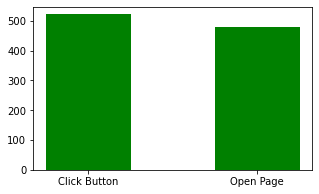

In [430]:
fig, ax = plt.subplots()
ax.bar(list(event_counts.index), list(event_counts.values.flatten()), 0.5, color='green')
fig.set_figwidth(5) 
fig.set_figheight(3)    
plt.show()

## Задание №2

### Условие:
Теперь представь, что файл из предыдущего задания размером, допустим, 10ГБ и он НЕ помещается в оперативную память.
Опиши варианты как будешь работать с данными, не помещающимися в память

### Решение:
* Хранить данные в БД и SQL-запросами постепенно получать только необходимые данные небольшими пакетами.

* Обрабатывать данные по частям (chunks). В качестве альтернативы чтению всего CSV-файла в память, библиотека pandas позволяет читать данные по частям с помощью цикла и аргумента chunksize для функции read_csv. Функция в этом случае возвращает итератор по DataFrames, а не один DataFrame (когда без параметра chunksize).

In [431]:
unique_users = list()
for chunk in pd.read_csv('events.csv', chunksize=200): # каждую итерацию берем по 200 строк данных
    df = pd.DataFrame(chunk)
    # обрабатываем этот df как хотим, ну и например:
    unique_users.extend(list(df.groupby('user_id').groups))
len(set(unique_users))

368

* Фильтрация. Выполняется в рамках одного chunk. Формулируется условие, по которому мы отбираем только те данные либо фичи, которые нам нужны. 

* Удаление. Мы можем удалять ненужные данные, например, выбросы ("ненормальные" значения) в каждом chunk-е и добавлять полученный chunk в итоговый data frame. Тем самым уменьшим количество данных. 

* Можно сэкономить память, если явно указывать загружаемые типы данных (параметр dtype в read_csv). Например, вместо int64 - int8, вместо float64 - float16 и т.д. (если диапазон чисел позволяет).

## Задание №3

### Условие:
Из каких распределений мог бы быть сгенерирован этот набор данных:
[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1]

In [432]:
array = np.array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

### Рассчитаем меры центральной тенденции и меры изменчивости:

In [433]:
median = np.median(array)
st_dev = np.std(array)
disp = np.var(array)
mean = np.mean(array)
median, mean, st_dev, disp

(0.5, 0.5, 0.5, 0.25)

Что мы имеем: набор данных имеет одинаковые значения медианы, моды и среднего. Стандартное отклонение от среднего (от 0.5) можно было и не считать, зная среднее в нашем случае)) Оно равно 0.5 (т.е. 0.5 от 0.5 влево и вправо - это 0 и 1).

Можно предположить, что данные сгенерированы либо нормальным, либо равномерным распределением (это допустимо, так как в наших данных всего два значения: 0 и 1). 

Теперь визуализируем распределение исходных данных array, а также сгенерируем array.size (т.е. 20) чисел:
- По закону нормального распределения
- По закону равномерного распределения

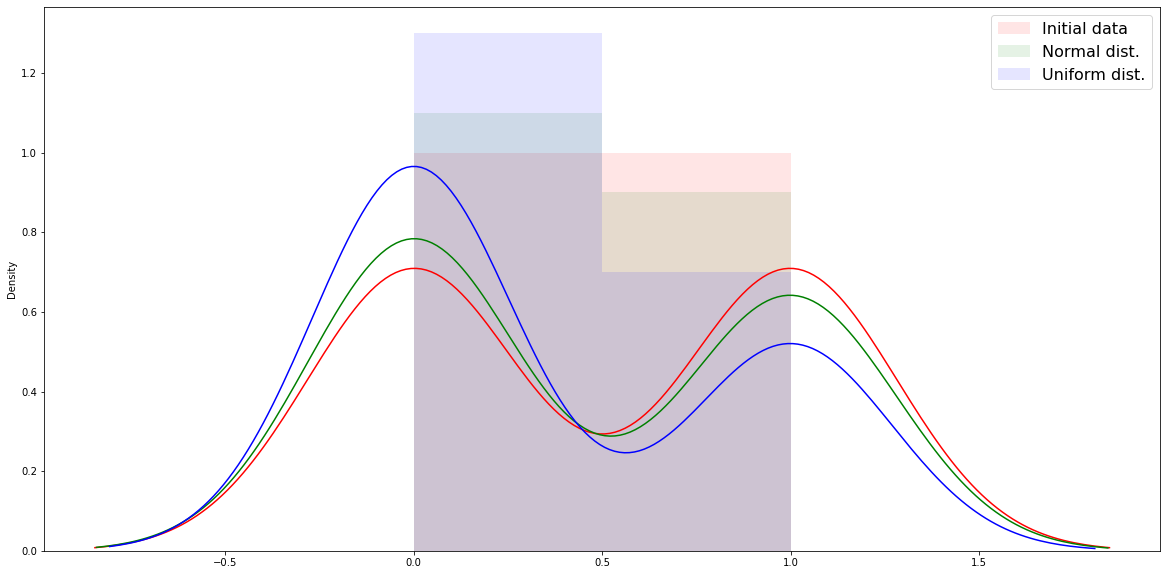

In [438]:
# Генерируем столько же значений по нормальному распределению:
array2 = [1 if np.random.normal(mean, st_dev) >= 0.5 else 0 for i in range(array.size)]
# Генерируем столько же значений по равномерному распределению:
array3 = [1 if np.random.uniform(np.min(array), np.max(array)) >= 0.5 else 0 for i in range(array.size)]

fig, ax = plt.subplots(figsize=(20, 10))
line1 = sb.distplot(array, kde=True, color='red', hist_kws={'alpha':0.1}, label='Initial data')
line2 = sb.distplot(array2, kde=True, color='green', hist_kws={'alpha':0.1}, label='Normal dist.')
line3 = sb.distplot(array3, kde=True, color='blue', hist_kws={'alpha':0.1}, label='Uniform dist.')

# Plot legend
plt.legend(prop={'size': 16})
plt.show()

#### Для того, чтобы точно увидеть, что гипотеза подтвердилась, необходимо запустить ячейку выше минимум 3-5 раз. 
Если красной линии не видно, значит она совпала с одной из линий нормального или равномерного распределения.

На графике очень хорошо видно, что равномерное и нормальное распределение действительно подобны распределению исходных данных. Таким образом, вывод: **набор данных [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1] может быть получен нормальным и равномерным распределением**.

## Задание №4

### Условие:

Вводные данные: 
* женщина Линда, 31 год.
* Робкая, спокойная, не замужем.
* В детстве посещала кружок фотографии.

**Какое развитие событий наиболее вероятно:**
* (Событие А) Линда - кассир в магазине
* (Событие B) Линда - библиотекарь
* (Событие C) Линда - кассир в магазине, увлекается фотографией природы

### Рассуждалка:
P(A), P(B) и P(C) зависят от большого количества факторов, которые могут изменить Линду как человека. Чем больше исходных данных или "фичей", к которым данные чувствительны, тем более точно можно предсказать исход. Однако, кое-какую информацию все-таки удается выудить.

P(A) > P(C), так как посещение кружка фотографии в детстве не гарантирует того, что Линда будет фотографировать природу, тем более, когда будет кассиром. 

Предположим, вероятность того, что Линда будет фотографом природы P(C) = 0.5, и вероятность того, что Линда будет кассиром тоже P(C) = 0.5. 0.5 (по-обывательски 50%) - довольно много. Но если рассматривать эти события как совместные, то мы получим горздо меньшее число: P(A+C) = 0.5 * 0.5 = 0.25. Поэтому точно могу сказать, что Линда скорее будет кассиром или библиотекарем, чем кассиром + фотографом.

Теперь включим интуицию и предскажем наконец-то для Линды профессию)) Линда у нас робкая и спокойная, еще и не замужем, наверняка она интроверт. Интроверты стараются избегать общения с людьми и предпочитают те места, где их меньше. Именно поэтому оцениваю, что P(B) > P(A) и Линде, вероятнее всего, больше подходит профессия библиотекаря.

### Ответ: (Событие B) Линда - библиотекарь